## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [136]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev
import emeval.viz.geojson as ezgj

In [3]:
# Analytics results
import emeval.metrics.baseline_segmentation as embs

In [4]:
# For plots
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline

import IPython.display as ipyd

In [5]:
# For maps
import folium
import branca.element as bre

In [6]:
# For easier debugging while working on modules
import importlib

In [7]:
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import arrow
import numpy as np

In [8]:
THIRTY_MINUTES = 30 * 60
TEN_MINUTES = 10 * 60

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [9]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")
sd_ucb_reroute = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_sm_reroute_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569388138}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569388139}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569388140}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Fou

## The views

There are two main views for the data - the phone view and the evaluation view. 

### Phone view

In the phone view, the phone is primary, and then there is a tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of loading the phone view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [10]:
importlib.reload(eipv)

<module 'emeval.input.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/input/phone_view.py'>

In [11]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 7 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567271203.764, 'end_time': 1567279427.961}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567288614.642, 'end_time': 1567297340.9

response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1567271164.779111, 'end_time'

response = <Response [200]>
Found 1868 entries
Retrieved 1868 entries with timestamps [1564274558.354, 1564274558.727, 1564274564.028, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571]...
About to retrieve data for ucb-sdb-android-2 from 1564280671.731 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564280671.731, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280652]...
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1854 entries
Retrieved 1854 entries with timestamps [1564274558.727, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-2 from 1567288623.391 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567288623.391, 'end_time': 1567297357.197}
response = <Response [200]>
Found 2121 entries
Retrieved 2121 entries with timestamps [1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917, 1567288918, 1567288919, 1567288920, 1567288921]...
About to retrieve data for ucb-sdb-android-2 from 1567296306.499 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567296306.499, 'end_time': 1567297357.197}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-3 from 1564274288.319 -> 1564282423.072
About t

response = <Response [200]>
Found 2159 entries
Retrieved 2159 entries with timestamps [1567271523.331, 1567271525, 1567271526, 1567271527, 1567271528, 1567271529, 1567271530, 1567271531, 1567271532, 1567271533]...
About to retrieve data for ucb-sdb-android-3 from 1567278441.249 -> 1567279372.922
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1567278441.249, 'end_time': 1567279372.922}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567278439.914]...
About to retrieve data for ucb-sdb-android-3 from 1567288638.503 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1567288638.503, 'end_time': 1567297394.837}
response = <Response [200]>
Found 2142 entries
Retrieved 2142 entries with timestamps [1567288849, 1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 15672889

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564342965.9946914]...
About to retrieve data for ucb-sdb-ios-1 from 1564333996.5363011 -> 1564342975.472409
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1564333996.5363011, 'end_time': 1564342975.472409}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564351246.07085, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 2214 entries
Retrieved 2214 entries with timestamps [1564351245.890137, 1564351251.02554, 1564351252.0238216, 1564351253.022198, 1564351254.0206494, 1564351255.0192485, 1564351257.0167162, 1564351258.0155365, 1564351259.0144756, 1564351261.0124218]...
About to retrieve data 

response = <Response [200]>
Found 1409 entries
Retrieved 1409 entries with timestamps [1564334605.343677, 1564334605.35634, 1564334608.9970002, 1564334609.9970446, 1564334610.9972146, 1564334611.9973783, 1564334612.9975357, 1564334613.9976838, 1564334614.9978194, 1564334615.9979572]...
About to retrieve data for ucb-sdb-ios-2 from 1564341004.17783 -> 1564342987.826695
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1564341004.17783, 'end_time': 1564342987.826695}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341003.9938674]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...
About to retrieve data for ucb-sdb-ios-3 from 1564274265.212364 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564274265.212364, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 164 entries
Retrieved 164 entries with timestamps [1564275493.428633, 1564275493.9934778, 1564275496.6995292, 1564275496.7031121, 1564279476.508539, 1564279477.556017, 1564279477.5692558, 1564279483.804306, 1564279491.801554, 1564279498.237344]...
About to retrieve data for ucb-sdb-ios-3 from 1564280497.5318642 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564280497.5318642, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...


response = <Response [200]>
Found 191 entries
Retrieved 191 entries with timestamps [1567288966.799432, 1567288970.999717, 1567288972.999673, 1567289002.9989781, 1567289006.998827, 1567289010.9986677, 1567289018.9983454, 1567289022.998178, 1567289026.9980106, 1567289035.9976294]...
About to retrieve data for ucb-sdb-ios-3 from 1567295578.123241 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1567295578.123241, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567295578.057469]...
About to retrieve data for ucb-sdb-ios-3 from 1567288581.6808891 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1567288581.6808891, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 177 entries
Retrieved 177 entries with timestamps [1567288970.999717, 1567288972.99

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564360156.019]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565571034.93 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 696 entries
Retrieved 696 entries with timestamps [1565571047.229, 1565571047.265, 1565571060.105, 1565571073.261, 1565571086.122, 1565571098.288, 1565571110.936, 1565571124.113, 1565571136.955, 1565571149.982]...
About to retrieve data for ucb-sdb-android-1 from 1565579001.09 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565579001.09, 'end_time': 1565579009.992}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565579001.09]..

response = <Response [200]>
Found 87 entries
Retrieved 87 entries with timestamps [1564274799.255, 1564274844.391, 1564274876.142, 1564274908.298, 1564274939.241, 1564274972.776, 1564275004.816, 1564275036.774, 1564275054.166, 1564275085.157]...
About to retrieve data for ucb-sdb-android-3 from 1564280654.09 -> 1564282423.072
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564280654.09, 'end_time': 1564282423.072}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280654.09]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1564334097.33 -> 1564343025.406
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 88 entries
Retrieved 88 entries with timestamps [1564334508.801, 1

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567279346.569]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1567288647.374 -> 1567297374.928
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1567288647.374, 'end_time': 1567297374.928}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1564274247.275763 -> 1564282290.729272
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564274247.275763, 'end_time': 1564282290.729272}
response = <Response [200]>
Found 517 entries
Retrieved 517 entries with timestamps [1564274270.7468784, 1564274273.2592103, 1564274323.4081597, 1564274353.5

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359604.1259458]...
About to retrieve data for ucb-sdb-ios-2 from 1565570980.468295 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565570980.468295, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 287 entries
Retrieved 287 entries with timestamps [1565570996.1814125, 1565571071.1814132, 1565571081.181413, 1565571086.1814132, 1565571176.1814127, 1565571186.1814127, 1565571191.1814127, 1565571196.1814127, 1565571216.1814125, 1565571246.1814132]...
About to retrieve data for ucb-sdb-ios-2 from 1565578879.3066506 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565578879.3066506, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565578879.3066506]...

response = <Response [200]>
Found 243 entries
Retrieved 243 entries with timestamps [1564274288.6357331, 1564274293.6357331, 1564274343.6357334, 1564274438.6357336, 1564274568.6357331, 1564274603.6357336, 1564274673.6357334, 1564274758.684916, 1564274797.4722486, 1564274835.013862]...
About to retrieve data for ucb-sdb-ios-4 from 1564282332.075515 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564282332.075515, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564282332.075515]...
About to retrieve data for ucb-sdb-ios-4 from 1564334069.1049929 -> 1564343007.721693
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 192 entries
Retrieved 192 entries with timestamps [1564334156.9572866, 15

response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564274288.319, 'end_time': 1564282423.072}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 12 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564351277.477, 'end_time': 1564360134.181}
response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transi

In [12]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565116007.631, 'end_time': 1565140213.84}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565194658.17, 'end_time': 1565217816

response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563821424.2870421, 'end_time': 1563846221.430156}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 16 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565115979.7075438, 'end_ti

response = <Response [200]>
Found 7073 entries
Retrieved 7073 entries with timestamps [1563821666.739, 1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 1563821679]...
About to retrieve data for ucb-sdb-android-2 from 1563846294.501 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563846294.501, 'end_time': 1563846294.773}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563843196]...
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 7067 entries
Retrieved 7067 entries with timestamps [1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 15

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216017.932]...
About to retrieve data for ucb-sdb-android-2 from 1565194646.726 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565194646.726, 'end_time': 1565217853.529}
response = <Response [200]>
Found 7218 entries
Retrieved 7218 entries with timestamps [1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565194920, 1565194921]...
About to retrieve data for ucb-sdb-android-2 from 1565217852.659 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565217852.659, 'end_time': 1565217853.529}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216012.932]...
About to retrieve data for ucb-sdb-android-3 from 1563821466.019 -> 1563846343.356
Abo

response = <Response [200]>
Found 6079 entries
Retrieved 6079 entries with timestamps [1565116058.369, 1565116062.181, 1565116067.966, 1565116075.631, 1565116080.689, 1565116087.501, 1565116096.527, 1565116105.79, 1565116113.564, 1565116118.668]...
About to retrieve data for ucb-sdb-android-3 from 1565140277.976 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140277.976, 'end_time': 1565140296.074}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 1565194636.421 -> 1565217890.224
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5253 entries
Retrieved 5253 entries with timestamps [1565194898.051, 1565194898.051, 1565194904.934, 1565194909.939, 1565194917.03

response = <Response [200]>
Found 5722 entries
Retrieved 5722 entries with timestamps [1563896678.561882, 1563896681.53107, 1563896682.0100274, 1563896683.009514, 1563896684.0088549, 1563896687.0071504, 1563896688.006662, 1563896690.0057957, 1563896691.0053968, 1563896692.0050101]...
About to retrieve data for ucb-sdb-ios-1 from 1563917428.5349998 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563917428.5349998, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917428.450831]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve dat

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4214 entries
Retrieved 4214 entries with timestamps [1563897071.5372581, 1563897071.539604, 1563897077.92377, 1563897085.836732, 1563897085.9985485, 1563897086.9985986, 1563897091.99877, 1563897092.9987903, 1563897093.998808, 1563897094.9988203]...
About to retrieve data for ucb-sdb-ios-2 from 1563915825.6501431 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563915825.6501431, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...

response = <Response [200]>
Found 1021 entries
Retrieved 1021 entries with timestamps [1563821693.67274, 1563821694.628164, 1563821694.6408582, 1563821701.492943, 1563821707.916102, 1563821714.441504, 1563821720.929595, 1563821727.351037, 1563821733.773116, 1563821740.1933188]...
About to retrieve data for ucb-sdb-ios-3 from 1563842661.888513 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563842661.888513, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842661.7784162]...
About to retrieve data for ucb-sdb-ios-3 from 1563821405.729749 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1563821405.729749, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 682 entries
Retrieved 682 entries with timestamps [1563821694.6408582, 1563821701.

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140175.999116]...
About to retrieve data for ucb-sdb-ios-3 from 1565194722.424724 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565194722.424724, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 971 entries
Retrieved 971 entries with timestamps [1565194974.483992, 1565195385.244978, 1565195388.503786, 1565195390.6859698, 1565195393.0103195, 1565195394.009594, 1565195395.0088694, 1565195397.007664, 1565195399.0066142, 1565195401.0057068]...
About to retrieve data for ucb-sdb-ios-3 from 1565214712.10034 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565214712.10034, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565214711.9975872]...
About to retrieve data

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565026006.793 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 733 entries
Retrieved 733 entries with timestamps [1565026007.617, 1565026007.643, 1565026019.694, 1565026019.727, 1565026032.668, 1565026045.749, 1565026058.634, 1565026071.786, 1565026084.795, 1565026098.289]...
About to retrieve data for ucb-sdb-android-1 from 1565050204.65 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565050204.65, 'end_time': 1565050217.383}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050204.65]

response = <Response [200]>
Found 231 entries
Retrieved 231 entries with timestamps [1563821738.499, 1563821779.842, 1563821837.62, 1563821842.841, 1563821877.531, 1563821908.583, 1563821930.869, 1563821962.319, 1563821994.516, 1563822047.615]...
About to retrieve data for ucb-sdb-android-3 from 1563842914.109 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563842914.109, 'end_time': 1563846343.356}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842914.109]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563896782.972 -> 1563917505.1820002
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563896782.972, 'end_time': 1563917505.1820002}
response = <Response [200]>
Found 233 entries
Retrieved 233 entries with timestamps [1

response = <Response [200]>
Found 900 entries
Retrieved 900 entries with timestamps [1563821395.9146056, 1563821405.3125677, 1563821405.6250775, 1563821501.322351, 1563821503.8291569, 1563821656.8780947, 1563821699.5039434, 1563821704.5208488, 1563821714.5498688, 1563821739.6214435]...
About to retrieve data for ucb-sdb-ios-1 from 1563846085.4912872 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563846085.4912872, 'end_time': 1563846150.16837}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563846085.4912872]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 543 entries
Retrieved 543 entries with timestamps [1563896727.012053,

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050092.7069602]...
About to retrieve data for ucb-sdb-ios-2 from 1565115934.904733 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565115934.904733, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 444 entries
Retrieved 444 entries with timestamps [1565115942.1383767, 1565115944.637134, 1565115988.9834712, 1565116098.9834712, 1565116103.9834714, 1565116176.9178183, 1565116181.917818, 1565116231.917819, 1565116426.917818, 1565116431.9178183]...
About to retrieve data for ucb-sdb-ios-2 from 1565140011.1331575 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565140011.1331575, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140011.1331575]...
Ab

response = <Response [200]>
Found 255 entries
Retrieved 255 entries with timestamps [1563896733.0620825, 1563896750.5781207, 1563896760.5781207, 1563896795.5781212, 1563896815.5781212, 1563896875.5781207, 1563896890.5781207, 1563896910.5781202, 1563896930.5781205, 1563896935.5781207]...
About to retrieve data for ucb-sdb-ios-4 from 1563916932.9843733 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563916932.9843733, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916932.9843733]...
About to retrieve data for ucb-sdb-ios-4 from 1564244069.2081819 -> 1564263869.479578
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 388 entries
Retrieved 388 entries with timestamps [1564244070.7108

response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565026028.417, 'end_time': 1565050275.592}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565194696.183675, 'end_time': 1565217805.7350268}
response = <Response [200]>
Found 16 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling label ucb-sdb-android-1 for OS android
Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label

In [13]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 72 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 24 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 15641986

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 14149 entries
Retrieved 14149 entries with timestamps [1563979683.523, 1563979683.523, 1563979686.541, 1563979691, 1563979692, 1563979693, 1563979694, 1563979695, 1563979696, 1563979697]...
About to retrieve data for ucb-sdb-android-2 from 1564021868.503 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564021868.503, 'end_time': 1564026016.571}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564021794]...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages us

response = <Response [200]>
Found 875 entries
Retrieved 875 entries with timestamps [1564154023.987, 1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 1564154211, 1564154241]...
About to retrieve data for ucb-sdb-android-3 from 1564196589.192 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564196589.192, 'end_time': 1564198700.606}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564196587.808]...
About to retrieve data for ucb-sdb-android-3 from 1564153836.582 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153836.582, 'end_time': 1564198700.606}
response = <Response [200]>
Found 721 entries
Retrieved 721 entries with timestamps [1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 156415

response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 1563980044.385489, 1563980046.1162372, 1563980047.1293101, 1563980047.999834, 1563980048.9998174, 1563980049.9998074, 1563980050.9997978, 1563980051.9997861, 1563980053.999772]...
About to retrieve data for ucb-sdb-ios-2 from 1564023575.128773 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564023575.128773, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564023574.9863236]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 10525 entries
Retrieved 10525 entries with timestamps [1563980044.385489

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564109946.124861]...
About to retrieve data for ucb-sdb-ios-3 from 1564153754.09529 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564153754.09529, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 2321 entries
Retrieved 2321 entries with timestamps [1564117209.9645019, 1564154572.964088, 1564154849.341601, 1564155206.677164, 1564155222.038831, 1564155229.005299, 1564155244.811119, 1564155251.220082, 1564155273.199754, 1564155282.301773]...
About to retrieve data for ucb-sdb-ios-3 from 1564198595.263564 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564198595.263564, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198595.1684551]...
About to retrieve data f

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564107892.911]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564153809.884 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1587 entries
Retrieved 1587 entries with timestamps [1564154036.632, 1564154049, 1564154057.113, 1564154065.3, 1564154078.39, 1564154091.102, 1564154103.719, 1564154116.522, 1564154125.219, 1564154134.269]...
About to retrieve data for ucb-sdb-android-2 from 1564193889.939 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564193889.939, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564193889.939]..

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198468.2332456]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 927 entries
Retrieved 927 entries with timestamps [1563979677.622645, 1563979767.6226444, 1563979772.6226444, 1563979787.6226444, 1563980990.0595727, 1563980993.8012114, 1563981015.9809394, 1563981085.6387854, 1563981089.7018366, 1563981093.760253]...
About to retrieve data for ucb-sdb-ios-2 from 1564026145.1770449 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564026145.1770449, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026145.1770449]..

response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition']

In [14]:
pv_ucb_reroute = eipv.PhoneView(sd_ucb_reroute)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/eva

response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568214664.759, 'end_time': 1568259367.23}
response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568732827.102, 'end_time': 1568775432.33}
response = <Response [200]>
Found 19 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 32 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568214683.663, 'end_time': 1568259367.23}
response = <Response [200]>
Found 25 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568732838.865, 'end_time': 156877545

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 12323 entries
Retrieved 12323 entries with timestamps [1568128293.495, 1568128293.495, 1568128295.417, 1568128300.537, 1568128305.58, 1568128310.629, 1568128315.679, 1568128320.785, 1568128325.84, 1568128330.889]...
About to retrieve data for ucb-sdb-android-2 from 1568169577.077 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568169577.077, 'end_time': 1568171423.307}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568169576.259]...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259381]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568732848.143, 'end_time': 1568775473.326}
response = <Response [200]>
Found 6930 entries
Retrieved 6930 entries with timestamps [1568732847.721, 1568732847.721, 1568732849.254, 1568732860.245, 1568732868.085, 1568732873.249, 1568732878.288, 1568732883.355, 1568732888.395, 1568732896.124]...
About to retrieve data for ucb-sdb-android-3 from 1568775472.624 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568775472.624, 'end_time': 1568775473.326}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775472.141]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...
About to retrieve data for ucb-sdb-ios-2 from 1568128234.2934499 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568128234.2934499, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 7926 entries
Retrieved 7926 entries with timestamps [1568128608.704241, 1568128608.704241, 1568128611.3965454, 1568128613.00422, 1568128614.0039368, 1568128615.0036702, 1568128617.0031762, 1568128618.0029507, 1568128619.00274, 1568128620.002542]...
About to retrieve data for ucb-sdb-ios-2 from 1568171384.342057 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568171384.342057, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...

response = <Response [200]>
Found 3120 entries
Retrieved 3120 entries with timestamps [1568733090.4660358, 1568733231.789537, 1568733236.933502, 1568733240.0436425, 1568733266.0061285, 1568733287.998708, 1568733306.9964137, 1568733326.9950864, 1568733352.9937966, 1568733374.992795]...
About to retrieve data for ucb-sdb-ios-3 from 1568775392.084474 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1568775392.084474, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775391.9997694]...
About to retrieve data for ucb-sdb-ios-3 from 1568732800.530198 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1568732800.530198, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 2792 entries
Retrieved 2792 entries with timestamps [1568733231.789537, 15687

response = <Response [200]>
Found 1486 entries
Retrieved 1486 entries with timestamps [1568733033.138, 1568733046.84, 1568733062.798, 1568733079.658, 1568733089.731, 1568733099.868, 1568733116.628, 1568733128.374, 1568733144.145, 1568733160.971]...
About to retrieve data for ucb-sdb-android-2 from 1568773380.898 -> 1568775451.963
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1568773380.898, 'end_time': 1568775451.963}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568773380.898]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1568128304.271 -> 1568171480.428
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 1994 entries
Retrieved 1994 entries with timestamps [15681

response = <Response [200]>
Found 640 entries
Retrieved 640 entries with timestamps [1568214668.6757827, 1568214748.675783, 1568215663.8944585, 1568215673.8944583, 1568215688.8944592, 1568215693.8944592, 1568215808.8944588, 1568215975.12434, 1568215992.6017208, 1568216148.9740565]...
About to retrieve data for ucb-sdb-ios-2 from 1568259292.0169773 -> 1568259320.4247599
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568259292.0169773, 'end_time': 1568259320.4247599}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259292.0169773]...
About to retrieve data for ucb-sdb-ios-2 from 1568732781.243727 -> 1568775365.402838
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568732781.243727, 'end_time': 1568775365.402838}
response = <Response [200]>
Found 760 entries
Retrieved 760 entries with timestamps [1568732783.287293,

response = <Response [200]>
Found 11 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1568732838.865, 'end_time': 1568775451.963}
response = <Response [200]>
Found 20 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568214696.732, 'end_time': 1568259402.365}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition

In [124]:
import emeval.analysed.phone_view as eapv
importlib.reload(eapv)

<module 'emeval.analysed.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/analysed/phone_view.py'>

In [96]:
av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_sj = eapv.create_analysed_view(pv_sj, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb = eapv.create_analysed_view(pv_ucb, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb_reroute = eapv.create_analysed_view(pv_ucb_reroute, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569390696}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390696}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390696}
response = <Response [200]>
Found 0 en

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390702}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390702}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-27T17:38:14.643000-07:00 -> 2019-07-27T19:53:50.466000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-27T17:38:54.143985-07:00 -> 2019-07-27T17:54:56.504297-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-27T18:59:17.435039-07:00 -> 2019-07-27T19:20:57.464819-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_

response = <Response [200]>
Found 6048 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390705}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390705}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00',

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390708}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390708}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

Filter range = 2019-08-31T14:57:42.798072-07:00 -> 2019-08-31T15:14:48.798746-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-08-31T16:30:05.301877-07:00 -> 2019-08-31T16:51:33.719355-07:00
After filtering, trips = []
Finished copying car_scooter_brex_san_jose, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569390723}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390728}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390728}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390729}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:51:13.886000-07:00 -> 2019-07-22T18:46:06.416000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before f

response = <Response [200]>
Found 6048 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390732}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390732}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00',

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569390737}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390737}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569390737}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:50:24.287042-07:00 -> 2019-07-22T18:43:41.430156-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before filte

response = <Response [200]>
Found 5078 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569390754}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390754}
response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:28.840000-07:00', '2019-07-22T16:09:09.235548

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569390757}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390760}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569390760}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390760}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:48:30.362000-07:00 -> 2019-07-24T20:

response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390763}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00', '2019-07-23T08:51:11.537258-07:00', '2019-07-23T12:54:46.097426-07:00', '2019-07-24T07:51:38.667585-07:00', '2019-07-24T08:29:45.498660-07:00', '2019-07-24T14:13:46.520613-07:00', '2019-07-24T16

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569390766}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390766}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569390767}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569390767}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:47:21.017038-07:00 -> 2019-07-24T20:43:27.14

response = <Response [200]>
Found 5078 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569390786}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569390786}
response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:28.840000-07:00', '2019-07-22T16:09:09.235548

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569390789}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569390789}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-4 power_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/recreated_location'], 'start_time': 1567321200, 'end_time': 1569390789}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569390789}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569390789}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_

response = <Response [200]>
Found 6048 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569390792}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569390792}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00',

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569390795}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569390795}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-09-10T08:11:12.775363-07:00 -> 2019-09-10T20:09:53.541299-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T08:12:39.439087-07:00 -> 2019-09-10T10:37:19.789012-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T13:39:45.196231-07:00 -> 2019-09-10T13:51:53.609973-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T16:09:30.11

In [125]:
eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569419454}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569419454}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569419454}
response = <Response [200]>
Found 0 en

Before filtering, trips = [('2019-07-22T11:54:28.840000-07:00', '2019-07-22T12:22:10-07:00'), ('2019-07-22T16:09:09.235548-07:00', '2019-07-22T16:40:09-07:00'), ('2019-07-22T16:54:52.959029-07:00', '2019-07-22T17:34:44-07:00'), ('2019-07-22T17:34:45.700000-07:00', '2019-07-22T17:45:14-07:00'), ('2019-07-23T08:50:21.106000-07:00', '2019-07-23T09:17:27-07:00'), ('2019-07-23T09:17:28-07:00', '2019-07-23T09:18:56-07:00'), ('2019-07-23T12:40:03.240301-07:00', '2019-07-23T12:41:31-07:00'), ('2019-07-23T12:42:06-07:00', '2019-07-23T12:43:06-07:00'), ('2019-07-23T12:43:07-07:00', '2019-07-23T13:03:00-07:00'), ('2019-07-23T13:03:02-07:00', '2019-07-23T13:04:24-07:00'), ('2019-07-23T13:07:01.517002-07:00', '2019-07-23T13:51:12-07:00'), ('2019-07-23T13:51:14-07:00', '2019-07-23T14:00:24-07:00'), ('2019-07-24T07:53:44-07:00', '2019-07-24T08:07:50-07:00'), ('2019-07-24T08:30:15.414270-07:00', '2019-07-24T09:12:38-07:00'), ('2019-07-24T09:19:09.561793-07:00', '2019-07-24T10:15:34-07:00'), ('2019-07-

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569419462}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569419462}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:22:51-07:00

Before filtering, trips = [('2019-07-22T11:55:16.121000-07:00', '2019-07-22T12:20:50-07:00'), ('2019-07-22T12:21:19.740000-07:00', '2019-07-22T12:22:51-07:00'), ('2019-07-22T16:18:12.631352-07:00', '2019-07-22T16:39:58-07:00'), ('2019-07-22T16:55:02.396931-07:00', '2019-07-22T17:34:44.171000-07:00'), ('2019-07-22T17:35:01-07:00', '2019-07-22T17:45:02-07:00'), ('2019-07-23T08:51:18.945000-07:00', '2019-07-23T09:18:57.215000-07:00'), ('2019-07-23T09:19:29-07:00', '2019-07-23T09:21:33.601000-07:00'), ('2019-07-23T12:43:39.047090-07:00', '2019-07-23T13:05:46-07:00'), ('2019-07-23T13:08:20.846226-07:00', '2019-07-23T13:51:11.665000-07:00'), ('2019-07-23T13:51:24-07:00', '2019-07-23T14:01:54.639000-07:00'), ('2019-07-24T07:53:03.939000-07:00', '2019-07-24T08:07:20-07:00'), ('2019-07-24T08:28:23.349792-07:00', '2019-07-24T09:11:36-07:00'), ('2019-07-24T09:19:18.807406-07:00', '2019-07-24T10:13:45.097000-07:00'), ('2019-07-24T10:14:15.120000-07:00', '2019-07-24T10:17:51-07:00'), ('2019-07-24T1

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569419463}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569419463}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:ACCURACY_CONTROL_0 HAHFDC v/s MAHFDC accuracy_control_0 2
Before filtering, trips = []
Filter range = 2019-07-27T17:37:27.275763-07:00 -> 2019-07-27T19:51

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569419468}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569419468}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = [('2019-07-22T11:54:54.640858-07:00', '2019-07-22T12:12:05.875441-07:00'

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-27T17:37:56.021558-07:00 -> 2019-07-27T19:52:12.153510-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-27T17:38:54.143985-07:00 -> 2019-07-27T17:54:56.504297-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-27T18:59:17.435039-07:00 -> 2019-07-27T19:20:57.464819-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_

In [97]:
ANDROID_MODE_MAP = {0: "AUTOMOTIVE", 1: "CYCLING", 2: "WALKING", 3: "STATIONARY"}
ANDROID_MAP_FN = lambda t: ANDROID_MODE_MAP[t["zzbhB"]]

def IOS_MAP_FN(t):
    t_series = pd.Series(t)
    all_true = t_series[t_series == True].index.tolist()
    if len(all_true) == 1:
        return all_true[0].upper()
    else:
        # Do something more sophisticated here?
        return "INVALID"

MAP_FNS = {"android": ANDROID_MAP_FN, "ios": IOS_MAP_FN}
TRANSITION_FNS = {"android": embs.get_transition_mask_android, "ios": embs.get_transition_mask_ios}

In [98]:
def get_tradeoff_entries(pv):
    tradeoff_entry_list = []
    for phone_os, phone_map in pv.map().items():
        print(15 * "=*")
        print(phone_os, phone_map.keys())
        for phone_label, phone_detail_map in phone_map.items():
            print(4 * ' ', 15 * "-*")
            print(4 * ' ', phone_label, phone_detail_map.keys())
            if "control" in phone_detail_map["role"]:
                print("Ignoring %s phone %s since they are always on" % (phone_detail_map["role"], phone_label))
                continue
            # this spec does not have any calibration ranges, but evaluation ranges are actually cooler
            for r in phone_detail_map["evaluation_ranges"]:
                print(8 * ' ', 30 * "=")
                print(8 * ' ',r.keys())
                print(8 * ' ',r["trip_id"], r["eval_common_trip_id"], r["eval_role"], len(r["evaluation_trip_ranges"]))
                bcs = r["battery_df"]["battery_level_pct"]
                delta_battery = bcs.iloc[0] - bcs.iloc[-1]
                print("Battery starts at %d, ends at %d, drain = %d" % (bcs.iloc[0], bcs.iloc[-1], delta_battery))
                for tr in r["evaluation_trip_ranges"]:
                    matching_section_map = embs.find_matching_segments(tr["evaluation_section_ranges"], 
                                                                      "trip_id",
                                                                       [sr["data"] for sr in tr["sensed_section_ranges"]])
                    print("For trip %s, found matching ranges %s" % (tr["trip_id"], matching_section_map))
                    for section in tr["evaluation_section_ranges"]:
                        section_gt_leg = pv.spec_details.get_ground_truth_for_leg(tr["trip_id_base"],
                                                                                  section["trip_id_base"])
                        if section_gt_leg["type"] == "WAITING":
                            print("Skipping WAITING section %s %s with potential partway transitions" %
                                  (tr["trip_id"], section["trip_id"]))
                            continue
                        print(12 * ' ',section["trip_id"], section["trip_id_base"], tr["trip_id"])
                        sensed_section_range = matching_section_map[section["trip_id"]]
                        results = embs.get_count_start_end_ts_diff(section, sensed_section_range)
                        tradeoff_entry = {"phone_os": phone_os, "phone_label": phone_label,
                                      "timeline": pv.spec_details.curr_spec["id"],
                                      "range_id": r["trip_id"],
                                     "run": r["trip_run"], "duration": r["duration"],
                                     "role": r["eval_role_base"], "battery_drain": delta_battery,
                                     "section_count": len(tr["sensed_section_ranges"]),
                                     "trip_id": tr["trip_id"],
                                     "section_id": section["trip_id"],
                                     "section_type": section_gt_leg["type"]}
                        tradeoff_entry.update(results)
                        tradeoff_entry_list.append(tradeoff_entry)

    return tradeoff_entry_list

In [99]:
# We are not going to look at battery life at the evaluation trip level; we will end with evaluation range
# since we want to capture the overall drain for the timeline
tradeoff_entries_list = []
tradeoff_entries_list.extend(get_tradeoff_entries(av_la))
tradeoff_entries_list.extend(get_tradeoff_entries(av_sj))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb_reroute))
tradeoff_df = pd.DataFrame(tradeoff_entries_list)

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
Ignoring accuracy_control phone ucb-sdb-android-1 since they are always on
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-2 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'fi

Skipping WAITING section mtv_to_berkeley_sf_bart_0 wait_for_subway_underground_0 with potential partway transitions
             subway_underground_0 subway_underground mtv_to_berkeley_sf_bart_0
             walk_to_bus_0 walk_to_bus mtv_to_berkeley_sf_bart_0
Skipping WAITING section mtv_to_berkeley_sf_bart_0 wait_for_city_bus_short_0 with potential partway transitions
             city_bus_short_0 city_bus_short mtv_to_berkeley_sf_bart_0
             walk_end_0 walk_end mtv_to_berkeley_sf_bart_0
Found matching lengths 1 = 1
For trip walk_urban_university_0, found matching ranges {'walk_urban_university_0': {'type': 'both', 'match': [{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '5d83f21cf6858f0caf65a32d'}, 'start_ts': 1564002722.9840717, 'start_local_dt': {'year': 2019, 'month': 7, 'day': 24, 'hour': 14, 'minute': 12, 'second': 2, 'weekday': 2, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-07-24T14:12:02.984072-07:00', 'start_loc': {'type': 'Point', 'coo

## Add in other entries to the dataframe to allow us to plot better

In [100]:
# Let's merge the reroutes
tradeoff_df.timeline.replace("train_bus_ebike_sm_reroute_mtv_ucb", "train_bus_ebike_mtv_ucb", inplace=True)

In [101]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 2, "HAHFDC": 3, "accuracy_control": 4}
q2r_map = {0: "power", 1: "HAMFDC", 2: "MAHFDC", 3: "HAHFDC", 4: "accuracy"}

In [102]:
# Make a number so that can get the plots to come out in order
tradeoff_df["quality"] = tradeoff_df.role.apply(lambda r: r2q_map[r])
tradeoff_df["count_diff"] = tradeoff_df[["count"]] - 1

## Timeline + section count variations

We should ideally have only one transition in every TRAVEL section

In [103]:
tradeoff_df.query("timeline=='unimodal_trip_car_bike_mtv_la' & run == 1 & role == 'HAMFDC'").section_id

42                      walk_start_0
43     suburb_city_driving_weekend_0
44                        walk_end_0
45                      walk_start_0
46                suburb_bicycling_0
47                        walk_end_0
132                     walk_start_0
133    suburb_city_driving_weekend_0
134                       walk_end_0
135                     walk_start_0
136               suburb_bicycling_0
137                       walk_end_0
Name: section_id, dtype: object

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Section count differences v/s configured quality over multiple timelines')

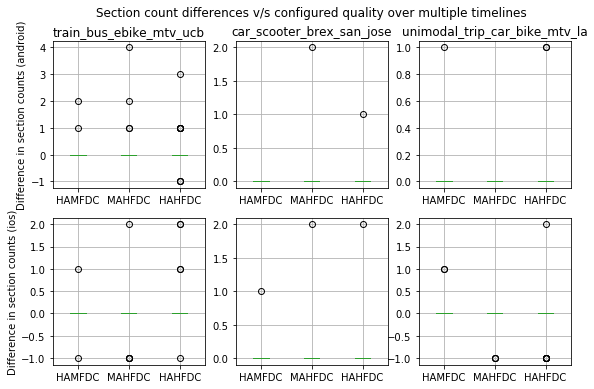

In [104]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,6), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    tradeoff_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["count_diff"], by=["quality"])
    ax_array[0][i].set_title(tl)
    tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["count_diff"], by=["quality"])
    ax_array[1][i].set_title("")
    # tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["visit_reports"], by=["quality"])
    # ax_array[2][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

# for ax in ax_array[1]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

# for ax in ax_array[2]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

ax_array[0][0].set_ylabel("Difference in section counts (android)")
ax_array[1][0].set_ylabel("Difference in section counts (ios)")
# ax_array[2][0].set_ylabel("Difference in visit reports (ios)")
ifig.suptitle("Section count differences v/s configured quality over multiple timelines")
# ifig.tight_layout()

In [105]:
embs.find_section_transitions(pv_la.map()["android"]["ucb-sdb-android-2"]["evaluation_ranges"][3]["evaluation_trip_ranges"][0]["motion_activity_df"].query(embs.ANDROID_VALID_QUERY_NO_STILL), embs.TRANSITION_FNS["android"])

write_ts  zzbhB  zzbhC                ts  \
2  1565571097.240000      2     98 1565571097.240000   
14 1565571224.258000      0     96 1565571224.258000   
79 1565571982.767000      2     96 1565571982.767000   

                            fmt_time       hr  
2   2019-08-11T17:51:37.240000-07:00 0.014738  
14  2019-08-11T17:53:44.258000-07:00 0.050021  
79  2019-08-11T18:06:22.767000-07:00 0.260718

In [106]:
def plot_count_with_errors(ax_array, phone_os):
    for i, (tl, trip_gt) in enumerate(timeline_trip_gt.items()):
        ax_array[i].bar(0, trip_gt)
        for q in range(1,4):
            curr_df = tradeoff_df.query("timeline == @tl & phone_os == @phone_os & quality == @q")
            print("%s %s %s values = %s %s %s" % (phone_os, tl, q2r_map[q], curr_df.section_count.min(), curr_df.section_count.mean(), curr_df.section_count.max()))
            lower_error = curr_df.section_count.mean() - curr_df.section_count.min()
            upper_error = curr_df.section_count.max() - curr_df.section_count.mean()
            ax_array[i].bar(x=q, height=curr_df.section_count.mean(),
                            yerr=[[lower_error], [upper_error]])
            print("%s %s %s errors = %s %s %s" % (phone_os, tl, q2r_map[q], lower_error, curr_df.section_count.mean(), upper_error))
            ax_array[i].set_title(tl)

android train_bus_ebike_mtv_ucb HAMFDC values = 1 7.568627450980392 10
android train_bus_ebike_mtv_ucb HAMFDC errors = 6.568627450980392 7.568627450980392 2.431372549019608
android train_bus_ebike_mtv_ucb MAHFDC values = 1 8.72549019607843 13
android train_bus_ebike_mtv_ucb MAHFDC errors = 7.725490196078431 8.72549019607843 4.274509803921569
android train_bus_ebike_mtv_ucb HAHFDC values = 1 7.323529411764706 10
android train_bus_ebike_mtv_ucb HAHFDC errors = 6.323529411764706 7.323529411764706 2.6764705882352944
android car_scooter_brex_san_jose HAMFDC values = 2 2.625 3
android car_scooter_brex_san_jose HAMFDC errors = 0.625 2.625 0.375
android car_scooter_brex_san_jose MAHFDC values = 1 3.6666666666666665 7
android car_scooter_brex_san_jose MAHFDC errors = 2.6666666666666665 3.6666666666666665 3.3333333333333335
android car_scooter_brex_san_jose HAHFDC values = 1 3.25 6
android car_scooter_brex_san_jose HAHFDC errors = 2.25 3.25 2.75
android unimodal_trip_car_bike_mtv_la HAMFDC value

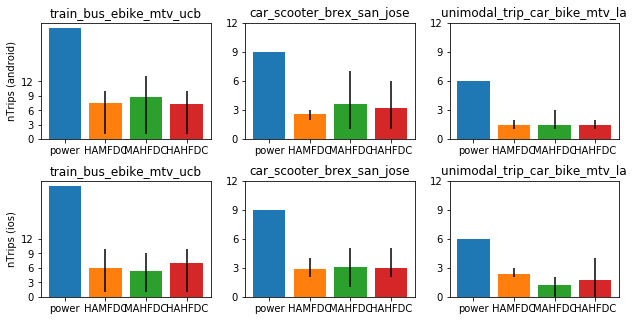

In [107]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,4.5), sharex=False, sharey=False)
section_count = lambda pv: sum([len(t["legs"]) for t in pv.spec_details.curr_spec["evaluation_trips"]])
timeline_trip_gt = {"train_bus_ebike_mtv_ucb": section_count(pv_ucb),
                    "car_scooter_brex_san_jose": section_count(pv_sj),
                    "unimodal_trip_car_bike_mtv_la": section_count(pv_la)}

plot_count_with_errors(ax_array[0], "android")
plot_count_with_errors(ax_array[1], "ios")

for ax in ax_array[0]:
    ax.set_xticks(range(0,4))
    ax.set_xticklabels([q2r_map[r] for r in range(0,4)])
    ax.set_yticks(range(0,tradeoff_df.section_count.max(),3))
    
for ax in ax_array[1]:
    ax.set_xticks(range(0,4))
    ax.set_xticklabels([q2r_map[r] for r in range(0,4)])
    ax.set_yticks(range(0,tradeoff_df.section_count.max(),3))
    
ax_array[0,0].set_ylabel("nTrips (android)")
ax_array[1,0].set_ylabel("nTrips (ios)")
    
ifig.tight_layout(pad=0.85)

In [108]:
out_of_battery_phones = tradeoff_df.query("timeline=='train_bus_ebike_mtv_ucb' & role=='HAHFDC' & trip_id=='berkeley_to_mtv_SF_express_bus_0' & phone_os == 'android'")
for i in out_of_battery_phones.index:
    tradeoff_df.loc[i,"end_diff_mins"] = float('nan')

## Timeline + section count variations (TRAVEL sections only)

We should ideally have only one transition in every TRAVEL section

In [109]:
tradeoff_df.query("timeline=='unimodal_trip_car_bike_mtv_la' & run == 1 & role == 'HAMFDC'").section_id

42                      walk_start_0
43     suburb_city_driving_weekend_0
44                        walk_end_0
45                      walk_start_0
46                suburb_bicycling_0
47                        walk_end_0
132                     walk_start_0
133    suburb_city_driving_weekend_0
134                       walk_end_0
135                     walk_start_0
136               suburb_bicycling_0
137                       walk_end_0
Name: section_id, dtype: object

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Section count differences v/s configured quality over multiple timelines')

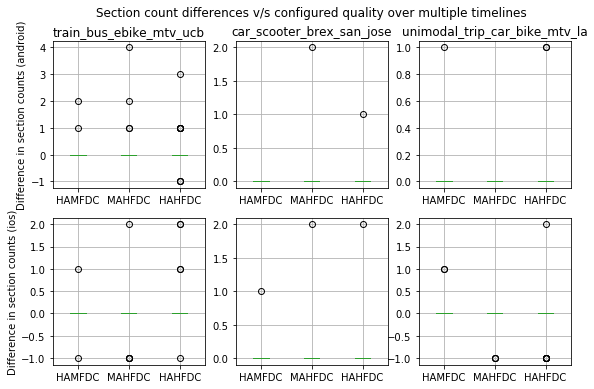

In [167]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,6), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    tradeoff_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["count_diff"], by=["quality"])
    ax_array[0][i].set_title(tl)
    tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["count_diff"], by=["quality"])
    ax_array[1][i].set_title("")
    # tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["visit_reports"], by=["quality"])
    # ax_array[2][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

# for ax in ax_array[1]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

# for ax in ax_array[2]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

ax_array[0][0].set_ylabel("Difference in section counts (android)")
ax_array[1][0].set_ylabel("Difference in section counts (ios)")
# ax_array[2][0].set_ylabel("Difference in visit reports (ios)")
ifig.suptitle("Section count differences v/s configured quality over multiple timelines")
# ifig.tight_layout()

In [112]:
tradeoff_df.query("count_diff < 0 & section_type == 'TRAVEL' & end_diff_mins > 0")

battery_drain  count     duration  end_diff_mins    phone_label phone_os  \
97        0.000000      0  8177.745916      30.000000  ucb-sdb-ios-2      ios   
100       0.000000      0  8177.745916      30.000000  ucb-sdb-ios-2      ios   
109       2.999997      0  8057.337313      30.000000  ucb-sdb-ios-3      ios   
519      19.000000      0 44849.466496      30.000000  ucb-sdb-ios-3      ios   
536      19.000000      0 44847.878125      30.000000  ucb-sdb-ios-3      ios   

                       range_id    role  run  section_count  \
97   HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              0   
100  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              0   
109  HAHFDC v/s MAHFDC:MAHFDC_0  MAHFDC    0              0   
519  HAHFDC v/s MAHFDC:MAHFDC_1  MAHFDC    1              4   
536  HAHFDC v/s MAHFDC:MAHFDC_2  MAHFDC    2              4   

                          section_id section_type  start_diff_mins  \
97     suburb_city_driving_weekend_0       TRAVEL        30.000000   
100               suburb_bicycling_0       TRAVEL        30.000000   
109    suburb_city_driving_weekend_0       TRAVEL        30.000000   
519  light_rail_below_above_ground_0       TRAVEL        30.000000   
536  light_rail_below_above_ground_0       TRAVEL        30.000000   

                          timeline                           trip_id  quality  \
97   unimodal_trip_car_bike_mtv_la     suburb_city_driving_weekend_0        3   
100  unimodal_trip_car_bike_mtv_la                suburb_bicycling_0        3   
109  unimodal_trip_car_bike_mtv_la     suburb_city_driving_weekend_0        2   
519        train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus_0        2   
536        train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus_0        2   

     count_diff  
97           -1  
100          -1  
109          -1  
519          -1  
536          -1

In [165]:
ipyd.display(tradeoff_df.query("count_diff > 0 & section_type == 'TRAVEL'").section_id.value_counts())

suburb_bicycling_0                  4
light_rail_below_above_ground_0     4
ebike_bikeshare_urban_long_0        4
city_escooter_0                     3
commuter_rail_with_tunnels_0        2
subway_underground_0                2
walk to the bikeshare location_0    2
city_bus_short_0                    1
freeway_driving_weekday_0           1
city_bus_rapid_transit_0            1
walk_to_bus_0                       1
suburb_city_driving_weekend_0       1
express_bus_0                       1
commuter_rail_aboveground_0         1
Name: section_id, dtype: int64

### Start-end results

#### Overall

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, '')

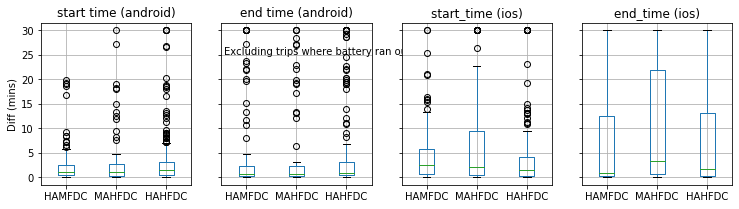

In [168]:
ifig, ax_array = plt.subplots(nrows=1,ncols=4,figsize=(12,3), sharex=False, sharey=True)
tradeoff_df.query("phone_os == 'android' & start_diff_mins").boxplot(ax = ax_array[0], column=["start_diff_mins"], by=["quality"])
ax_array[0].set_title("start time (android)")
tradeoff_df.query("phone_os == 'android' & start_diff_mins").boxplot(ax = ax_array[1], column=["end_diff_mins"], by=["quality"])
ax_array[1].set_title("end time (android)")
tradeoff_df.query("phone_os == 'ios' & start_diff_mins").boxplot(ax = ax_array[2], column=["start_diff_mins"], by=["quality"])
ax_array[2].set_title("start_time (ios)")
tradeoff_df.query("phone_os == 'ios' & start_diff_mins").boxplot(ax = ax_array[3], column=["end_diff_mins"], by=["quality"])
ax_array[3].set_title("end_time (ios)")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

ax_array[0].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[0].get_xticklabels()])
ax_array[1].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[1].get_xticklabels()])
ax_array[2].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[2].get_xticklabels()])
ax_array[3].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[3].get_xticklabels()])

for ax in ax_array:
    ax.set_xlabel("")

ax_array[1].text(0.55,25,"Excluding trips where battery ran out")

ax_array[0].set_ylabel("Diff (mins)")
# ifig.suptitle("Section start end accuracy v/s configured quality")
ifig.suptitle("")
# ifig.tight_layout(pad=1.7)

### Timeline specific

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Section start end accuracy (mins) v/s configured quality over multiple timelines')

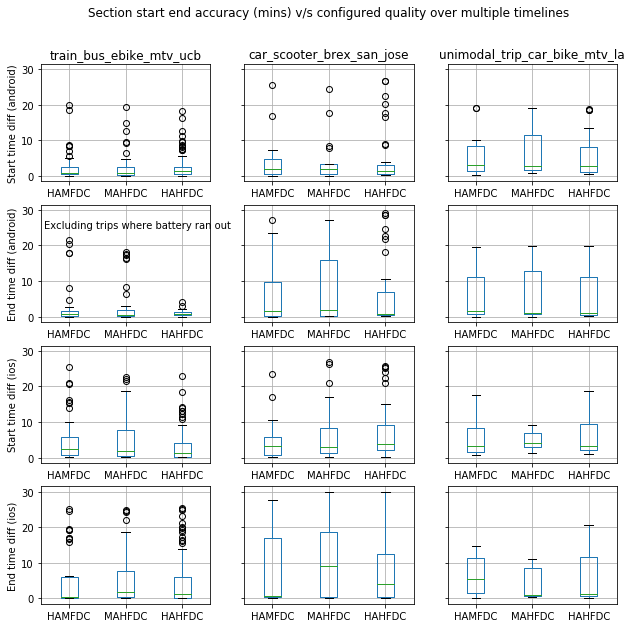

In [87]:
ifig, ax_array = plt.subplots(nrows=4,ncols=3,figsize=(10,10), sharex=False, sharey=True)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    tradeoff_df.query("timeline == @tl & phone_os == 'android' & start_diff_mins < 30").boxplot(ax = ax_array[0][i], column=["start_diff_mins"], by=["quality"])
    ax_array[0][i].set_title(tl)
    tradeoff_df.query("timeline == @tl & phone_os == 'android' & end_diff_mins < 30").boxplot(ax = ax_array[1][i], column=["end_diff_mins"], by=["quality"])
    ax_array[1][i].set_title("")
    tradeoff_df.query("timeline == @tl & phone_os == 'ios' & start_diff_mins < 30").boxplot(ax = ax_array[2][i], column=["start_diff_mins"], by=["quality"])
    ax_array[2][i].set_title("")
    tradeoff_df.query("timeline == @tl & phone_os == 'ios' & end_diff_mins < 30").boxplot(ax = ax_array[3][i], column=["end_diff_mins"], by=["quality"])
    ax_array[3][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for ax in ax_array[0]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")
    
for ax in ax_array[1]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[1,0].text(0.55,25,"Excluding trips where battery ran out")

for ax in ax_array[2]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for ax in ax_array[3]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[0][0].set_ylabel("Start time diff (android)")
ax_array[1][0].set_ylabel("End time diff (android)")
ax_array[2][0].set_ylabel("Start time diff (ios)")
ax_array[3][0].set_ylabel("End time diff (ios)")
ifig.suptitle("Section start end accuracy (mins) v/s configured quality over multiple timelines")

# ifig.tight_layout(pad=2.5)

In [88]:
pv_ucb.spec_details.curr_spec.keys()

dict_keys(['fmt_version', 'id', 'name', 'region', 'start_fmt_date', 'end_fmt_date', 'phones', 'calibration_tests', 'sensing_settings', 'evaluation_trips', 'setup_notes'])

### Anomaly checks

We can clearly see that there are several outliers with the start/end timestamps for the sections. Let us explore these in greater detail and see if we can find any patterns.

In [89]:
fmt = lambda ts: arrow.get(ts).to("America/Los_Angeles")


def check_outlier(eval_range, trip_idx, section_id):
    eval_trip = eval_range["evaluation_trip_ranges"][trip_idx]
    eval_range["motion_activity_df"]["fmt_time"] = eval_range["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_trip["motion_activity_df"]["fmt_time"] = eval_trip["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_section = [s for s in eval_trip["evaluation_section_ranges"] if s["trip_id"] == section_id][0]
    print(fmt(eval_section["start_ts"]), "->", fmt(eval_section["end_ts"]))
    print([(fmt(ssr["data"]["start_ts"]), fmt(ssr["data"]["end_ts"])) for ssr in eval_trip["sensed_section_ranges"]])
    match = embs.find_matching_segments(eval_trip["evaluation_section_ranges"], "trip_id",
                                        [sr["data"] for sr in eval_trip["sensed_section_ranges"]])[section_id]
    print(match)
    print([(fmt(cm["start_ts"]), fmt(cm["end_ts"])) for cm in match["match"]])
    print("trip activity head")
    ipyd.display(eval_trip["motion_activity_df"].head(n=3))
    print("trip activity tail")
    ipyd.display(eval_trip["motion_activity_df"].tail(n=3))
    trip_end_ts = eval_trip["end_ts"]
    print("post-trip end activity head")
    ipyd.display(eval_range["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60").head())

#### sections which don't max out but which have large start/end

- all the walk_start trips are because we only started tracking after the walk start section was complete. There was too short a walk section at the beginning
- the `tt_*` ones are likely to be similar since they are short
- the others (`walk_downtown_urban_canyon_0`, `commuter_rail_aboveground_0`, `ebike_bikeshare_urban_long_0`) are investigated in greater detail below

In [90]:
tradeoff_df.query("25 < end_diff_mins < 30")

battery_drain  count     duration  end_diff_mins        phone_label  \
144      45.999996      1 24843.408000      28.606771  ucb-sdb-android-2   
152      47.000004      1 20692.400000      29.181259  ucb-sdb-android-2   
176      42.000000      1 24222.303000      28.640264  ucb-sdb-android-2   
192      10.000000      1 24877.337000      27.273438  ucb-sdb-android-3   
216      32.000000      1 24247.175000      27.250148  ucb-sdb-android-3   
232      31.000000      1 23253.803000      27.079037  ucb-sdb-android-3   
240      13.000000      1 24786.488476      27.489997      ucb-sdb-ios-2   
248       6.000000      1 20948.817884      28.747821      ucb-sdb-ios-2   
259       6.999999      1 19805.042712      29.951003      ucb-sdb-ios-2   
264       6.000000      1 24164.107187      27.216683      ucb-sdb-ios-2   
272       6.999999      1 24145.188474      28.606902      ucb-sdb-ios-2   
275       6.999999      1 24145.188474      29.928245      ucb-sdb-ios-2   
280       6.000000      1 23018.118764      26.995622      ucb-sdb-ios-2   
296       1.999998      1 20958.635452      28.650767      ucb-sdb-ios-3   
307       0.999999      1 19803.716269      29.884320      ucb-sdb-ios-3   
312       6.999999      1 24172.064770      26.816765      ucb-sdb-ios-3   
320      11.000001      1 24388.158013      27.740129      ucb-sdb-ios-3   
328       8.999997      1 23061.788027      26.395614      ucb-sdb-ios-3   
671      38.000000      1 44696.648613      25.371293      ucb-sdb-ios-2   
682      35.000002      1 42584.159111      25.077311      ucb-sdb-ios-2   
720      44.999999      1 44652.658225      25.039361      ucb-sdb-ios-3   

    phone_os                    range_id    role  run  section_count  \
144  android  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0              1   
152  android  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              2   
176  android  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1              1   
192  android  HAHFDC v/s HAMFDC:HAMFDC_0  HAMFDC    0              2   
216  android  HAHFDC v/s MAHFDC:MAHFDC_0  MAHFDC    0              1   
232  android  HAHFDC v/s MAHFDC:MAHFDC_2  MAHFDC    2              2   
240      ios  HAHFDC v/s MAHFDC:HAHFDC_0  HAHFDC    0              1   
248      ios  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1              1   
259      ios  HAHFDC v/s MAHFDC:HAHFDC_2  HAHFDC    2              2   
264      ios  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0              1   
272      ios  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              1   
275      ios  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              2   
280      ios  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2              1   
296      ios  HAHFDC v/s MAHFDC:MAHFDC_1  MAHFDC    1              1   
307      ios  HAHFDC v/s MAHFDC:MAHFDC_2  MAHFDC    2              2   
312      ios  HAHFDC v/s HAMFDC:HAMFDC_0  HAMFDC    0              1   
320      ios  HAHFDC v/s HAMFDC:HAMFDC_1  HAMFDC    1              2   
328      ios  HAHFDC v/s HAMFDC:HAMFDC_2  HAMFDC    2              1   
671      ios  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              6   
682      ios  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2              3   
720      ios  HAHFDC v/s HAMFDC:HAMFDC_1  HAMFDC    1              6   

                                      section_id section_type  \
144                                 walk_start_0       ACCESS   
152                                 walk_start_0       ACCESS   
176                                 walk_start_0       ACCESS   
192                                 walk_start_0       ACCESS   
216                                 walk_start_0       ACCESS   
232                                 walk_start_0       ACCESS   
240                                 walk_start_0       ACCESS   
248                                 walk_start_0       ACCESS   
259                                 walk_start_0       ACCESS   
264                                 walk_start_0       ACCESS   
272                             

##### walk_start

too short, does not have sufficient transitions

In [91]:
check_outlier(av_sj.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][0], 0, "walk_start_0")

2019-07-22T11:51:30.568365-07:00 -> 2019-07-22T11:53:33.593749-07:00
[(<Arrow [2019-07-22T11:55:16.121000-07:00]>, <Arrow [2019-07-22T12:20:50-07:00]>), (<Arrow [2019-07-22T12:21:19.740000-07:00]>, <Arrow [2019-07-22T12:22:51-07:00]>)]
Found mismatched lengths 3 != 2, need to use more complex matching
{'type': 'both', 'match': [{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '5d83b07df6858f0cb0bba97e'}, 'start_ts': 1563821716.121, 'start_local_dt': {'year': 2019, 'month': 7, 'day': 22, 'hour': 11, 'minute': 55, 'second': 16, 'weekday': 0, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-07-22T11:55:16.121000-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-122.0807385, 37.3938443]}, 'end_ts': 1563823250.0, 'end_local_dt': {'year': 2019, 'month': 7, 'day': 22, 'hour': 12, 'minute': 20, 'second': 50, 'weekday': 0, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-07-22T12:20:50-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-121.8860107, 37.

write_ts  zzbhB  zzbhC                ts  \
0 1563821738.499000      4     40 1563821738.499000   
1 1563821779.842000      0     73 1563821779.842000   
2 1563821837.620000      4     40 1563821837.620000   

                           fmt_time       hr  
0  2019-07-22T11:55:38.499000-07:00 0.075689  
1  2019-07-22T11:56:19.842000-07:00 0.087173  
2  2019-07-22T11:57:17.620000-07:00 0.103222

trip activity tail


write_ts  zzbhB  zzbhC                ts  \
58 1563823295.598000      4     40 1563823295.598000   
59 1563823341.529000      2     97 1563823341.529000   
60 1563823371.794000      2     96 1563823371.794000   

                            fmt_time       hr  
58  2019-07-22T12:21:35.598000-07:00 0.508216  
59  2019-07-22T12:22:21.529000-07:00 0.520975  
60  2019-07-22T12:22:51.794000-07:00 0.529382

post-trip end activity head


write_ts  zzbhB  zzbhC                ts  \
61 1563823404.780000      2     96 1563823404.780000   
62 1563823435.912000      2     97 1563823435.912000   
63 1563823466.977000      2     92 1563823466.977000   
64 1563823497.906000      2     90 1563823497.906000   
65 1563823530.663000      4     40 1563823530.663000   

                            fmt_time       hr  
61  2019-07-22T12:23:24.780000-07:00 0.538545  
62  2019-07-22T12:23:55.912000-07:00 0.547192  
63  2019-07-22T12:24:26.977000-07:00 0.555822  
64  2019-07-22T12:24:57.906000-07:00 0.564413  
65  2019-07-22T12:25:30.663000-07:00 0.573512

##### commuter_rail_aboveground_0

too many transitions = flip flop. The GT is `08:31` -> `09:12` but the closest matching transition is from `08:34` to `08:46`. And in fact, we get one `walking` entry at around `2019-07-26T08:46:43.940675-07:00` which breaks up an otherwise consistent section.

In [92]:
check_outlier(pv_ucb.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][2], 0, "commuter_rail_aboveground_0")

2019-07-26T08:31:56.065814-07:00 -> 2019-07-26T09:12:01.181978-07:00


/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyError: 'sensed_section_ranges'

In [ ]:
arrow.get("2019-07-26T08:31:56.065814-07:00").timestamp, arrow.get("2019-07-26T09:12:01.181978-07:00").timestamp

In [ ]:
pv_ucb.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][2]["evaluation_trip_ranges"][0]["motion_activity_df"].query("1564155116 <= ts <= 1564157521").query(embs.IOS_VALID_QUERY_NO_STILL).loc[50:60]

##### walk_downtown_urban_canyon_0

no transition at end, bleeds over to the light rail. GT is `17:51` to `18:00`, closest range is `17:51` to `18:28`

In [ ]:
check_outlier(pv_ucb.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][2], 2, "walk_downtown_urban_canyon_0")

In [ ]:
arrow.get("2019-07-26T18:00:00-07:00").timestamp

In [ ]:
pv_ucb.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][2]["evaluation_trip_ranges"][2]["motion_activity_df"].query("1564189200 <= ts <= 1564190904")

##### ebike_bikeshare_urban_long

no transition at end, bleeds over to the express_bus. GT is `16:36` to `16:56`, first range is `16:37` to `17:23`

In [ ]:
check_outlier(pv_ucb.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][1], 2, "ebike_bikeshare_urban_long_0")

#### Sections which do max out

This has essentially one entry which is because we get no points at all

In [ ]:
tradeoff_df.query("start_diff_mins == 30 & end_diff_mins == 30 & section_id != 'walk_start_0' & section_id != 'walk_end_0'").groupby("section_id").section_id.count()

In [ ]:
check_outlier(pv_ucb.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 1, "walk_urban_university_0")

In [ ]:
for i in range(3):
    print(pv_ucb.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0]["evaluation_trip_ranges"][i]["motion_activity_df"].ts.count())

In [ ]:
# check_outlier(pv_ucb.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][2], 1, "walk_urban_university_0")

In [137]:
# r = pv_ucb.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][2]
# tr = r["evaluation_trip_ranges"][1]
# trip_end_ts = tr["end_ts"]
# trip_ma_df = tr["motion_activity_df"]
# extended_ma_df = r["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60")
# ma_df = pd.concat([trip_ma_df, extended_ma_df], axis="index")
# curr_trip_section_transitions = embs.find_section_transitions(ma_df.query(VALID_QUERIES_NO_STILL["android"]),
#                                                             TRANSITION_FNS["android"])
# still_section_transitions = extended_ma_df.query(STILL_ENTRIES["android"])
# if len(still_section_transitions) > 0:
#     curr_trip_section_transitions = curr_trip_section_transitions.append(still_section_transitions.iloc[0])
# ipyd.display(curr_trip_section_transitions)

##### suburb_bicycling

In [138]:
tradeoff_df.query("start_diff_mins == 30 & end_diff_mins == 30 & section_id == 'suburb_bicycling_0'")

battery_drain  count    duration  end_diff_mins    phone_label phone_os  \
100       0.000000      0 8177.745916      30.000000  ucb-sdb-ios-2      ios   

                       range_id    role  run  section_count  \
100  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1              0   

             section_id section_type  start_diff_mins  \
100  suburb_bicycling_0       TRAVEL        30.000000   

                          timeline             trip_id  quality  count_diff  
100  unimodal_trip_car_bike_mtv_la  suburb_bicycling_0        3          -1

In [139]:
check_outlier(av_la.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][4], 1, "suburb_bicycling_0")

2019-08-31T11:32:05.488671-07:00 -> 2019-08-31T11:51:45.958387-07:00
[]
Found no sensed segments, early return
{'type': 'none', 'match': []}
[]
trip activity head


automotive confidence  cycling  running  stationary                ts  \
186       False       high    False    False       False 1567276250.286037   
187       False     medium    False    False       False 1567276259.247548   
188       False       high    False    False       False 1567276261.739796   

     unknown  walking          write_ts       hr  \
186    False    False 1567276250.286037 1.419995   
187    False     True 1567276259.247548 1.422485   
188    False     True 1567276261.739796 1.423177   

                             fmt_time  
186  2019-08-31T11:30:50.286037-07:00  
187  2019-08-31T11:30:59.247548-07:00  
188  2019-08-31T11:31:01.739796-07:00

trip activity tail


automotive confidence  cycling  running  stationary                ts  \
211       False       high     True    False       False 1567277321.449078   
212       False       high    False    False       False 1567277503.942572   
213       False       high    False    False       False 1567277535.735793   

     unknown  walking          write_ts       hr  \
211    False    False 1567277321.449078 1.717541   
212    False    False 1567277503.942572 1.768233   
213    False     True 1567277535.735793 1.777065   

                             fmt_time  
211  2019-08-31T11:48:41.449078-07:00  
212  2019-08-31T11:51:43.942572-07:00  
213  2019-08-31T11:52:15.735793-07:00

post-trip end activity head


automotive confidence  cycling  running  stationary                ts  \
214       False       high    False    False       False 1567277780.244070   
215       False       high    False    False        True 1567277785.244070   
216       False       high    False    False       False 1567277795.244071   
217       False       high    False    False        True 1567277807.463132   
218       False       high    False    False       False 1567277809.636533   

     unknown  walking          write_ts       hr  \
214    False    False 1567277780.244070 1.844984   
215    False    False 1567277785.244070 1.846373   
216    False    False 1567277795.244071 1.849150   
217    False    False 1567277807.463132 1.852544   
218    False    False 1567277809.636533 1.853148   

                             fmt_time  
214  2019-08-31T11:56:20.244070-07:00  
215  2019-08-31T11:56:25.244070-07:00  
216  2019-08-31T11:56:35.244071-07:00  
217  2019-08-31T11:56:47.463132-07:00  
218  2019-08-31T11:56:49.636533-07:00

In [159]:
r = av_la.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][4]
tr = r["evaluation_trip_ranges"][1]
print([(fmt(sr["start_ts"]), fmt(sr["end_ts"])) for sr in r["evaluation_trip_ranges"]])
print([(sr["data"]["start_fmt_time"], sr["data"]["end_fmt_time"]) for sr in r["sensed_trip_ranges"]])
ipyd.display(r["transition_df"][["currState","transition", "fmt_time"]])
pvr = pv_la.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][4]
gt_leg = sd_la.get_ground_truth_for_leg("suburb_bicycling", "suburb_bicycling"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
name_err_time = lambda lr: "%d: %s" % (lr["index"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))
gt_16k = lambda lr: (1567272304 <= lr["ts"] <= 1567272305) or (1567277181 <= lr["ts"] <= 1567277184)
folium.GeoJson(ezgj.get_geojson_for_loc_df(pvr["location_df"], color="red"), name="sensed_values").add_to(curr_map)
ezgj.get_fg_for_loc_df(pvr["location_df"], name="sensed_points", color="red", popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)
folium.LayerControl().add_to(curr_map)
curr_map
# print([(sr["data"]["start_fmt_time"], sr["data"]["end_fmt_time"]) for sr in av_la.map()['ios']['ucb-sdb-ios-3']["sensed_section_ranges"]])
# print([(sr["data"]["start_fmt_time"], sr["data"]["end_fmt_time"]) for sr in tr["sensed_section_ranges"]])
# ma_df = tr["motion_activity_df"]
# we may get some transitions after the trip ends 
# let's expand the activity range to account for that
# trip_end_ts = tr["end_ts"]
# ma_df = pd.concat([ma_df, 
#             r["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60")],
#             axis="index")
# embs.find_section_transitions(ma_df.query(IOS_VALID_QUERY_WITH_STILL), get_transition_mask_ios).count()

[(<Arrow [2019-08-31T10:07:27.557744-07:00]>, <Arrow [2019-08-31T10:23:08.473621-07:00]>), (<Arrow [2019-08-31T11:30:50.166396-07:00]>, <Arrow [2019-08-31T11:52:38.771930-07:00]>)]
[('2019-08-31T10:25:07.058955-07:00', '2019-08-31T11:54:17.429140-07:00')]


currState             transition  \
0         STATE_TRACKING_STOPPED       T_START_TRACKING   
1                    STATE_START           T_INITIALIZE   
2                    STATE_START        T_INIT_COMPLETE   
3   STATE_WAITING_FOR_TRIP_START          T_VISIT_ENDED   
4   STATE_WAITING_FOR_TRIP_START         T_TRIP_STARTED   
5             STATE_ONGOING_TRIP         T_TRIP_STARTED   
6             STATE_ONGOING_TRIP        T_VISIT_STARTED   
7             STATE_ONGOING_TRIP    T_TRIP_END_DETECTED   
8             STATE_ONGOING_TRIP          T_VISIT_ENDED   
9             STATE_ONGOING_TRIP        T_VISIT_STARTED   
10            STATE_ONGOING_TRIP    T_TRIP_END_DETECTED   
11            STATE_ONGOING_TRIP    T_END_TRIP_TRACKING   
12            STATE_ONGOING_TRIP           T_TRIP_ENDED   
13  STATE_WAITING_FOR_TRIP_START          T_DATA_PUSHED   
14  STATE_WAITING_FOR_TRIP_START        T_VISIT_STARTED   
15  STATE_WAITING_FOR_TRIP_START          T_VISIT_ENDED   
16  STATE_WAITING_FOR_TRIP_START         T_TRIP_STARTED   
17            STATE_ONGOING_TRIP         T_TRIP_STARTED   
18            STATE_ONGOING_TRIP       T_TRIP_RESTARTED   
19            STATE_ONGOING_TRIP        T_VISIT_STARTED   
20            STATE_ONGOING_TRIP    T_TRIP_END_DETECTED   
21            STATE_ONGOING_TRIP    T_END_TRIP_TRACKING   
22            STATE_ONGOING_TRIP           T_TRIP_ENDED   
23  STATE_WAITING_FOR_TRIP_START          T_DATA_PUSHED   
24  STATE_WAITING_FOR_TRIP_START  T_FORCE_STOP_TRACKING   
25  STATE_WAITING_FOR_TRIP_START     T_TRACKING_STOPPED   

                            fmt_time  
0   2019-08-31T10:05:38.420980-07:00  
1   2019-08-31T10:05:38.497473-07:00  
2   2019-08-31T10:05:39.402217-07:00  
3   2019-08-31T10:10:19.703943-07:00  
4   2019-08-31T10:10:19.787761-07:00  
5   2019-08-31T10:10:19.972914-07:00  
6   2019-08-31T10:10:20.413837-07:00  
7   2019-08-31T10:10:20.501003-07:00  
8   2019-08-31T10:25:04.889133-07:00  
9   2019-08-31T10:25:52.379147-07:00  
10  2019-08-31T10:25:52.462429-07:00  
11  2019-08-31T10:25:53.364999-07:00  
12  2019-08-31T10:25:53.458482-07:00  
13  2019-08-31T10:25:54.362051-07:00  
14  2019-08-31T10:25:55.367541-07:00  
15  2019-08-31T11:46:21.953932-07:00  
16  2019-08-31T11:46:22.048866-07:00  
17  2019-08-31T11:46:22.194301-07:00  
18  2019-08-31T11:46:22.432296-07:00  
19  2019-08-31T11:54:17.954371-07:00  
20  2019-08-31T11:54:18.046088-07:00  
21  2019-08-31T11:54:19.149195-07:00  
22  2019-08-31T11:54:19.246114-07:00  
23  2019-08-31T12:21:49.623869-07:00  
24  2019-08-31T12:21:55.719182-07:00  
25  2019-08-31T12:21:55.846117-07:00

suburb_bicycling


In [141]:
for i in range(3):
    print(pv_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][i]["evaluation_trip_ranges"][1]["motion_activity_df"].ts.count())

26
21
12


##### walk_downtown_urban_canyon

In [ ]:
tradeoff_df.query("start_diff_mins == 30 & end_diff_mins == 30 & section_id == 'walk_downtown_urban_canyon_0'")

In [ ]:
check_outlier(pv_ucb.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][0], 2, "walk_downtown_urban_canyon_0")

In [ ]:
importlib.reload(ems)

In [ ]:
# r = pv_ucb.map()['ios']['ucb-sdb-ios-2']["evaluation_ranges"][0]
# tr = r["evaluation_trip_ranges"][2]
# sr = tr["evaluation_section_ranges"][5]; print(sr["trip_id"])
# embs.find_matching_segments(tr["evaluation_section_ranges"], "trip_id", tr["sensed_section_ranges"])

In [ ]:
# r = pv_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0]
# tr = r["evaluation_trip_ranges"][1]
# ma_df = tr["motion_activity_df"]
# we may get some transitions after the trip ends 
# let's expand the activity range to account for that
# trip_end_ts = tr["end_ts"]
# ma_df = pd.concat([ma_df, 
#             r["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60")],
#             axis="index")
# embs.find_section_transitions(ma_df.query(IOS_VALID_QUERY_WITH_STILL), get_transition_mask_ios).count()

In [ ]:
for i in range(3):
    print(pv_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][i]["evaluation_trip_ranges"][1]["motion_activity_df"].ts.count())